
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_1/Session_1_Linear_Regression_exercise_NOTSOLVED.ipynb)


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### Code to avoid cell auto-scrolling

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [4]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [6]:
#I believe we should only take into account two independent variables and one dependent. The two idependents being average time in the app and average time in the website and the independent being yearly amount spent.
#In order to check what variable influences more yearly amount spent I will create two models using the 2 different models. Then I will create a multivariate model to see if a combination of the two has a bigger explanatory capability.
#Altough it would be interesting to check for potential relationships between our two independents and length of membership I believe that is beyond the business question.


#### Check Missing values

In [7]:
customers.isnull().count()
#There are no missing values since all values are false when asking if there are null values.


Email                   500
Address                 500
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

#### Check disttribution of the target variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Yearly amount spent distribution')

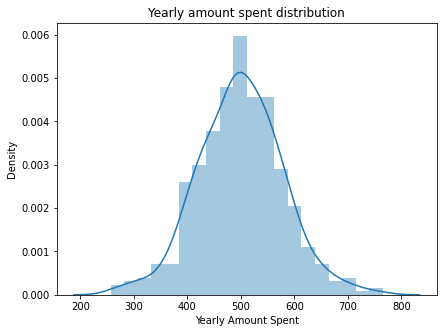

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(customers.iloc[:,7])
plt.title('Yearly amount spent distribution')
#We are going to use yearly amount spent as our target value. As we can see the variable is normally distributed around the mean which is 499.3.



#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

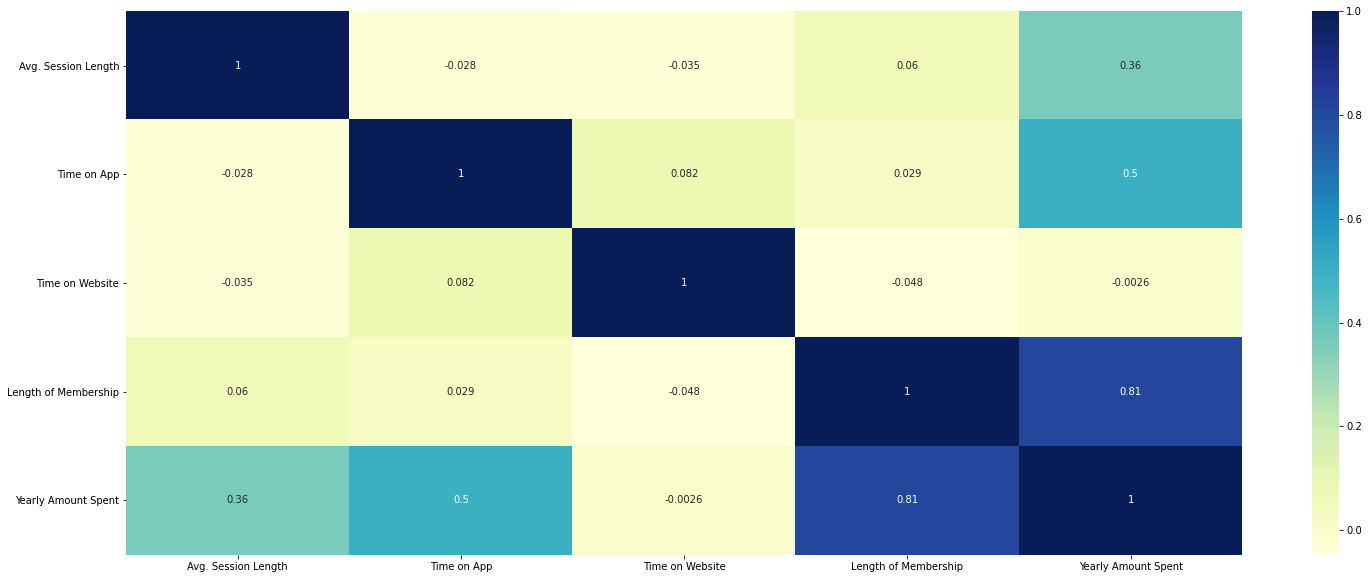

In [9]:
#First we are going to plot a heatmap to check overall correlation amongst variables to then explore more in detail this relationships.
plt.figure(figsize = (25,10))
sns.heatmap(customers.corr(),annot=True,cmap = 'YlGnBu')
plt.show()
#As we can see from the heatmap our two independent variables hav

As we can see from the heatmap our two independent variables have quite different correlation variables with our dependent variable. Time on website shows close to no correlation while time on app shows a 0.5 value which tells us there is some explanatory capability in this variable. In addition to this there is little correlation between our two independent variables this may prove useful later when ploting our model. Finally we can see that the two most correlated variables are length of membership and yearly amount spent this makes a lot of logical sense however its outside our business question.


In [10]:
#In the next cells we will do some joint plots to further visualize the relationship between our dependendent and independent variables.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x720 with 0 Axes>

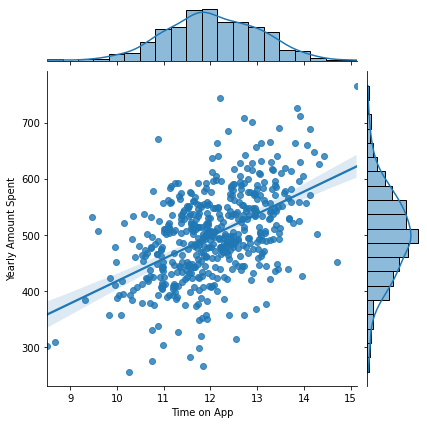

In [11]:
plt.figure(figsize = (25,10))
sns.jointplot(customers.iloc[:,4],customers.iloc[:,7],kind="reg")
plt.show()
 #As we can see through this plot there is a significant relationship between both variables (time on app vs yearly amount spent)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x720 with 0 Axes>

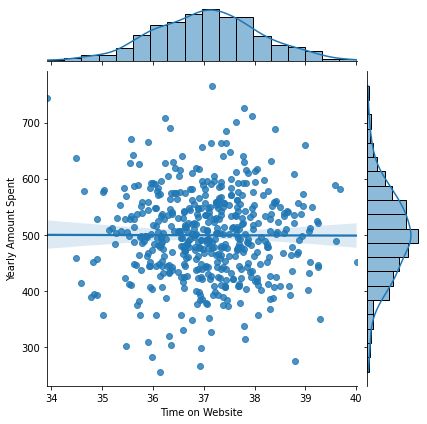

In [12]:
plt.figure(figsize = (25,10))
sns.jointplot(customers.iloc[:,5],customers.iloc[:,7],kind="reg")
plt.show()
 #As we can see through this plot there is no significant relationship between both variables (time on website vs yearly amount spent)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x720 with 0 Axes>

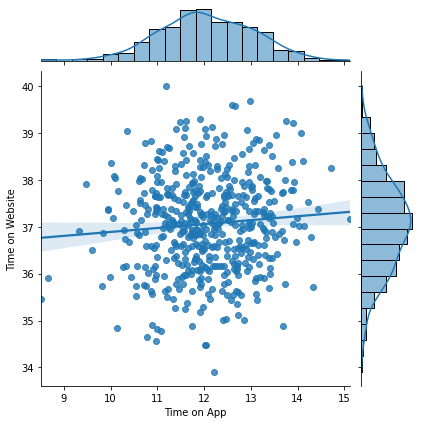

In [13]:
plt.figure(figsize = (25,10))
sns.jointplot(customers.iloc[:,4],customers.iloc[:,5],kind="reg")
plt.show()
#This plot shows a week correlation between both our independent variables, although the relationship is weak we should still be careful when deploying our model.

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [63]:
#We are going to plot two models using our two independent variables(although we know that time on the app has a far higher correlation i believe its interesting to create both models). We will see then what model is best at explaining our dependent variable.
#First we will use time spent on the app to create an OLS model.

### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [80]:
#Time on app model. We first slice our data to then split into train and test.
X = customers.iloc[:,4]
y = customers.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(375,)
(125,)
(375,)
(125,)


In [81]:
#Time on website model
R = customers.iloc[:,5]
z = customers.iloc[:,7]
R_train, R_test, z_train, z_test = train_test_split(R, z, test_size=0.25,random_state=5)
print(R_train.shape)
print(R_test.shape)
print(z_train.shape)
print(z_test.shape)


(375,)
(125,)
(375,)
(125,)


### Training of the model

In [17]:
#Time on app model. We are going to use numpys polynomial fit to create our model.
pred = np.polyfit(X_train,y_train,1)

In [64]:
#Time on website model
pred2 = np.polyfit(R_train,z_train,1)

#### Print the coeficients of the model

In [68]:
#Coeffictient time on app model
print(m)
#Intercept time on app  model
print(b)
#We will explain more in detail later the meaning of these coefficients

40.82223137363088
6.009022243659865


In [70]:
#Coeffictiet time on website model
print(r)
#Intercept time on website model
print(p)

1.8972994000579342
427.7013923038383


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

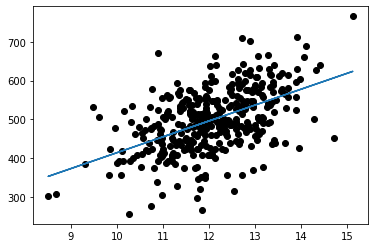

In [55]:
#Time on app plot
pred = np.polyfit(X_train,y_train,1)
m, b = np.polyfit(X_train,y_train,1)
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, m*X_train + b)
#As we can see we can appreciate some form of linear relationship between time in the app and yearly amount spent.

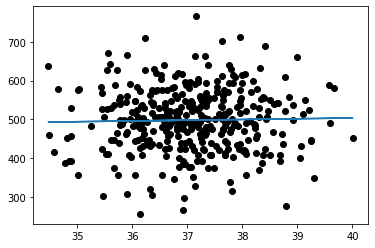

In [69]:
#Time on website plot
pred2 = np.polyfit(R_train,z_train,1)
r, p = np.polyfit(R_train,z_train,1)
plt.scatter(R_train, z_train, color='black')
plt.plot(R_train, r*R_train + p)
#However here there is close to no linearity between both variables. We almost have a straight line.

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

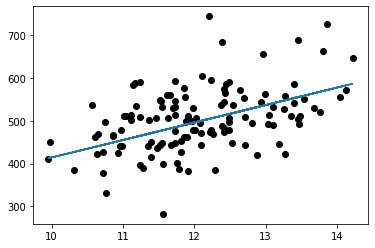

In [58]:
#Time on app model predictios plot
Prediction = np.polyval(pred, X_test)
plt.scatter(X_test,y_test, color='black')
plt.plot(X_test, Prediction)
#As we can see again in the prediction we can appreciate a kind of linear relationship in the test data which our model to a certain degree fits.

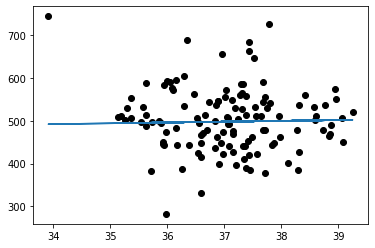

In [60]:
#Time on website model predictions plot
Prediction2 = np.polyval(pred2, R_test)
plt.scatter(R_test,z_test, color='black')
plt.plot(R_test, Prediction2)
#Again the test data has no linearity and our model completely misfits the data.

#### Evalution Metrics

In [76]:
#time on app model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score:",r2_score(y_test, Prediction))
print("mean squared error:",mean_squared_error(y_test,Prediction))
#We get weak r2 scores and quite a large mean squared error showing that our model does not fit too well the data. However it does have some predictive capabilities.



r2 score: 0.19460615741124754
mean squared error: 4517.454800562366


In [77]:
#time on website model evaluation
print("r2 score:",r2_score(z_test, Prediction2))
print("mean squared error:",mean_squared_error(z_test,Prediction2))
#Our model has an extremely poor performance with a negative r squared and a large mse

r2 score: -0.009900925004276084
mean squared error: 5664.535213093834


## Multivariate Model

In [128]:
X = customers.iloc[:,4]
y = customers.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
R = customers.iloc[:,5]
z = customers.iloc[:,7]
R_train, R_test, z_train, z_test = train_test_split(R, z, test_size=0.25,random_state=5)
print(R_train.shape)
print(R_test.shape)
print(z_train.shape)
print(z_test.shape)
variables = pd.concat([X_train, R_train], join = 'outer', axis = 1) 
variables2 = pd.concat([X_test,R_test],join='outer',axis = 1)
#We prepare our data by creating two dataframes that join and our two independent variables and split them in train test split.

(375,)
(125,)
(375,)
(125,)
(375,)
(125,)
(375,)
(125,)


In [129]:
variables = variables.sort_index()
variables2 = variables2.sort_index()

#We sort the variables in ascending order

,Time on App,Time on Website
9,11.814128,37.145168
21,12.877984,37.441021
28,11.982045,35.293088
33,13.104507,38.878041
34,11.634893,35.368626
...,...,...
479,11.761884,38.126520
481,12.482670,35.536025
484,11.903757,36.874544
494,13.350632,37.965972


### Training of the model

In [130]:
regr = linear_model.LinearRegression()
model = regr.fit(variables, y_train)
#We fit a linear model imported from sklearn

#### Print the coeficients of the model

In [131]:
print(regr.coef_)
#As we can see we get low coefficients

[-13.56971425   3.25273113]


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

In [132]:
m_prediction = model.predict(variables2)
m_prediction

array([501.52178328, 488.04790011, 493.21888187, 489.6482773 ,
       498.17533846, 503.88694148, 504.54275659, 483.36360518,
       505.37633778, 475.85197872, 522.79771144, 522.40772522,
       481.95204541, 483.74615679, 492.67935497, 500.92702179,
       494.17741856, 505.00191496, 493.77689618, 509.52468869,
       518.2257352 , 497.405404  , 498.99102495, 511.82110663,
       486.0726679 , 517.29705725, 499.1110395 , 502.44471281,
       513.66193226, 500.81892674, 489.51674568, 490.33786571,
       512.6233572 , 520.19804127, 494.67583018, 485.31292896,
       479.5232239 , 493.5817324 , 485.67595775, 495.43156873,
       518.90892212, 519.97309171, 509.77852368, 497.4888734 ,
       511.52447987, 502.76433618, 475.37064754, 504.05863052,
       488.71467935, 499.13014432, 511.40675938, 511.08341022,
       515.77014638, 494.65400421, 502.67389073, 478.89502194,
       484.75196039, 481.24409354, 504.09313366, 486.92562536,
       513.59405302, 470.09113033, 504.51497981, 483.27

#### Evalution Metrics

In [133]:
print("r2 score:",r2_score(y_test, m_prediction))
print("mean squared error:",mean_squared_error(y_test,m_prediction))
#Our multivariate model as we can see has a terrible performance with negative r squared and a large mse.

r2 score: -0.04604508214050784
mean squared error: 5867.267823567396


#### Which model has better performance?

Write your answer here: As we can see our first model has the best performance. This is due to the dependent and independent variable having the biggest correlation amongst each other. 
Model 2 and our multivariate model had extremely poor performances with negative r squared values meaning that our regression has performed worse than a horizontal line.







**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Write your answer here: We can conclude that our business owner should focus more on his app instead of on his website. Every hour more that the customer spent in the app would translate to a 40 increase in yearly spending. Every hour increase in website time however would only translate into a increase in 1  in yearly spending 






